In [1]:
import torch
from torch.optim import *
import torch.nn as nn
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc = nn.Linear(1,10)
    def forward(self, x):
        return self.fc(x)    

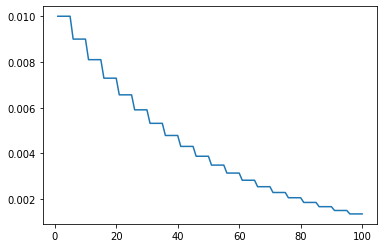

In [2]:
#每隔一段时间衰减
model = net()
LR = 0.01
optimizer = Adam(model.parameters(),lr=LR)
lrs = [LR]
for epoch in range(1,100):
    for p in optimizer.param_groups:
        if epoch % 5 == 0:
            p['lr']*=0.9
        lrs.append(p['lr'])
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

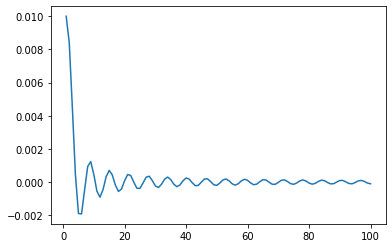

In [6]:
#使用公式计算，学习率,正弦震荡学习率
import numpy as np
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
lambda1 = lambda epoach: np.sin(epoch) / epoch
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda1)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step()
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

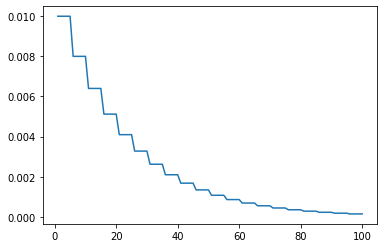

In [7]:
#StepLR阶梯式衰减 衰减倍数0.8
import numpy as np
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5,gamma=0.8)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step()
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

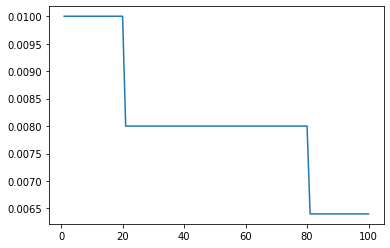

In [9]:
#不等间隔阶梯式衰减 衰减倍数0.8
import numpy as np
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
scheduler = lr_scheduler.MultiStepLR(optimizer,milestones=[20,80], gamma=0.8)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step()
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

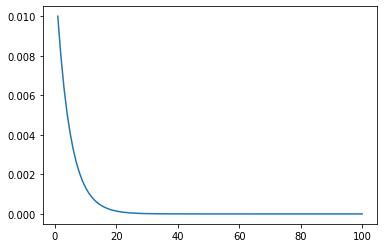

In [10]:
#不等间隔阶梯式衰减 衰减倍数0.8
import numpy as np
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
scheduler = lr_scheduler.ExponentialLR(optimizer,gamma=0.8)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step()
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

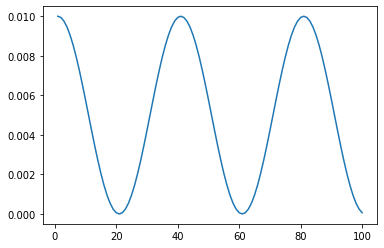

In [11]:
#余弦式调整，T_max是半个周期的epoach数
import numpy as np
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=20)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step()
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

tensor([-0.0604,  0.2227,  0.0258,  0.0104, -0.0518,  0.8012, -1.2231,  0.6102,
        -1.3002, -0.6712,  0.1905,  1.2583, -1.3845, -0.8786, -0.3253,  0.5176,
         1.1161, -0.2644,  2.5621,  0.0915, -1.8376,  0.4685,  0.1071,  0.8705,
         0.2236, -0.3517, -0.4093, -0.2754,  1.4892, -0.0452,  1.7588,  0.9756,
        -0.3822, -0.4943,  2.8346, -0.7590, -0.4023,  0.2835,  0.0990, -0.9968,
         1.2108, -1.0318,  0.6478, -0.7898, -1.4555, -2.7648, -1.0622, -0.0384,
         1.4076,  0.1051, -1.1999, -2.0677, -0.8810, -0.1923, -0.4576, -0.4546,
        -0.1404, -0.0970, -1.8228, -0.5960,  1.2770,  0.1063,  0.0913, -2.3366,
         0.0385,  0.2018, -0.8163, -1.2396, -0.8895, -0.8103,  0.1472,  0.9361,
         0.3772,  0.5833,  0.1455, -1.6048, -0.0765, -0.1761,  0.8995,  0.3114,
         0.1249, -2.9264, -1.4078,  0.7704,  0.7326, -1.0780, -1.0976,  0.5532,
         0.4660, -0.2300,  0.8534, -0.8884, -1.1081, -0.0054,  0.0450, -0.3002,
        -0.6335, -1.7140, -0.4430,  0.13

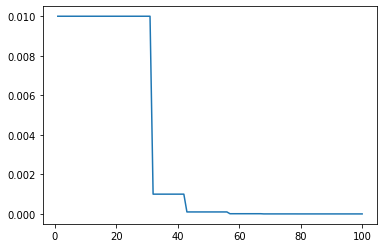

In [16]:
#余弦式调整，T_max是半个周期的epoach数
'''
mode：’min’模式检测metric是否不再减小，’max’模式检测metric是否不再增大；
factor：触发条件后lr*=factor；
patience：不再减小（或增大）的累计次数；
verbose：触发条件后print；
threshold：只关注超过阈值的显著变化；
threshold_mode：有rel和abs两种阈值计算模式，rel规则：max模式下如果超过best(1+threshold)为显著，min模式下如果低于best(1-threshold)为显著；abs规则：max模式下如果超过best+threshold为显著，min模式下如果低于best-threshold为显著；
cooldown：触发一次条件后，等待一定epoch再进行检测，避免lr下降过速；
min_lr：最小的允许lr；
eps：如果新旧lr之间的差异小与1e-8，则忽略此次更新。
'''
import numpy as np
import torch
model = net()
LR = 0.01
lrs = [LR]
optimizer = Adam(model.parameters(),lr=LR)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.1, patience = 10, 
                                           verbose = False, threshold = 0.0001, threshold_mode = 'rel', 
                                           cooldown = 0, min_lr = 0, eps = 1e-08)
loss = torch.randn(101)
print(loss)
for epoch in range(1,100):
    for p in optimizer.param_groups:
        optimizer.step()
        scheduler.step(loss[epoch])
        lrs.append(p['lr'])
        
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(len(lrs))],lrs)
plt.show()

In [17]:
#2d，3d批标准化
'''
num_features：来自期望输入的特征数，该期望输入的大小为：batch_size * num_features(* width)
eps：为保证数值稳定性（分母不能趋近或取0），给分母加上的值，默认为1e-5。
momentum：计算动态均值和动态方差并进行移动平均所使用的动量，默认为0.1。
affine：一个布尔值，当设为true时，就给该层添加可学习的仿射变换参数。仿射变换将在后文做简单介绍。
BatchNorm1d可以有两种输入输出：
1.输入（N，C），输出（N，C）。
2.输入（N，C，L），输出（N，C，L）。
'''
import torch
import torch.nn as nn
# 添加了可学习的仿射变换参数
m = nn.BatchNorm1d(100)
# 未添加可学习的仿射变换参数
m = nn.BatchNorm1d(100, affine = False)
input1 = torch.autograd.Variable(torch.randn(20, 100))
output = m(input1)

In [18]:
m

BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)

In [19]:
#3d 4d批标准化
'''
BatchNorm2d也可以有两种输入输出：
1.输入（N，C，L），输出（N，C，L）。
2.输入（N，C，H，W），输出（N，C，H，W）。
'''
import torch
import torch.nn as nn
m = nn.BatchNorm2d(100)
#或者
m = nn.BatchNorm2d(100, affine = False)
input = torch.autograd.Variable(torch.randn(20, 100, 35, 45))
output = m(input)
#4d或5d输入
'''
BatchNorm3d同样支持两种输入输出：
1.输入（N，C，H，W），输出（N，C，H，W）。
2.输入（N，C，D，H，W），输出（N，C，D，H，W）。
'''
m = nn.BatchNorm3d(100)
#或者
m = nn.BatchNorm3d(100, affine=False)